## MI5
###  LAMA : Luisa, Myriam, Ammar


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

In [47]:
sound1 = np.loadtxt('sound1.dat')
sound2 = np.loadtxt('sound2.dat')

s = np.array([sound1, sound2])

# number of sources
N = 2
# number of samples
p = 18000

# mixing matrix
A = np.random.rand(N,N)
while np.linalg.det(A) == 0:
    A = np.random.rand(N,N)

# mixing the sources
x = np.dot(A,s)
x_permuted= np.random.permutation(x)
#x_permuted = np.apply_along_axis(np.random.permutation,axis = 1, arr = x)

In [48]:
# centering the data
x_centered = x_permuted - np.mean(x_permuted, axis = 0)

# initializing W
W = np.random.rand(N, N)

### Exercise 2

#### normal gradient

In [49]:
f = lambda y : 1/(1+ np.exp(-y))

def normal_gradient(x_centered):
    W = np.random.rand(N, N)

    eta_0 = 0.1
    frobenius_normal = []

    for i in range (1,x.shape[1]):
        W_memory = W
        eta = eta_0/i 
        gradient = np.linalg.inv(W) + (1- 2*f(np.dot(W,x_centered[:,i])))*x_centered[:,i]
        W = W + eta*gradient
        if i %1000 == 0:
            frobenius_normal.append(np.sum((W-W_memory)**2))
    return W, frobenius_normal
W_normal, frobenius_normal = normal_gradient(x_centered)

#### natural gradient

In [50]:
def natural_gradient(x_centered):
    eta_0 = 0.01
    W_natural = np.random.rand(N, N)
    frobenius_natural = []

    for i in range (1,x.shape[1]): 
        W_memory = W_natural
        eta = eta_0/i 
        gradient = (1 + (1-2*f(np.dot(W,x_centered[:,i]))*np.dot(W,x_centered[:,i])))*W
        W_natural = W_natural + eta*gradient
        if i %1000 == 0:
            frobenius_natural.append(np.sum((W_natural-W_memory)**2))
    return W_natural, frobenius_natural

W_natural, frobenius_natural = natural_gradient(x_centered)
recovered_signals_natural =np.dot(W_natural, x_centered)

## Exercise 3

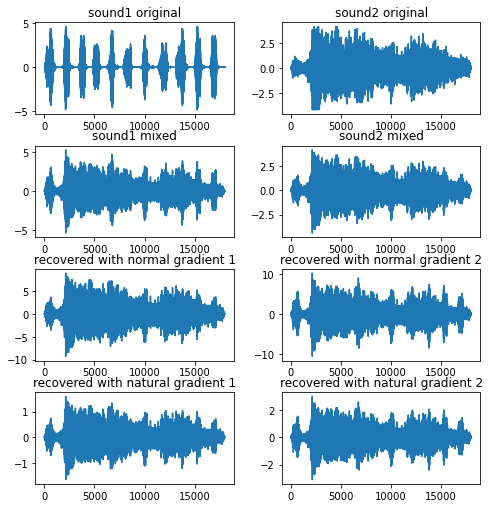

In [51]:
recovered_signals_normal =np.dot(W_normal, x)
recovered_signals_natural =np.dot(W_natural, x)


fig, ax = plt.subplots(4,2, figsize = (7,7))
fig.tight_layout()
ax[0][0].plot(sound1)
ax[0][0].set_title('sound1 original')
ax[0][1].plot(sound2)
ax[0][1].set_title('sound2 original')
ax[1][0].plot(x[0])
ax[1][0].set_title('sound1 mixed')
ax[1][1].plot(x[1])
ax[1][1].set_title('sound2 mixed')
ax[2][0].plot(recovered_signals_normal[0] )
ax[2][0].set_title('recovered with normal gradient 1')
ax[2][1].plot(recovered_signals_normal[1])
ax[2][1].set_title('recovered with normal gradient 2')
ax[3][0].plot(recovered_signals_natural[0] )
ax[3][0].set_title('recovered with natural gradient 1')
ax[3][1].plot(recovered_signals_natural[1])
ax[3][1].set_title('recovered with natural gradient 2')
plt.show()

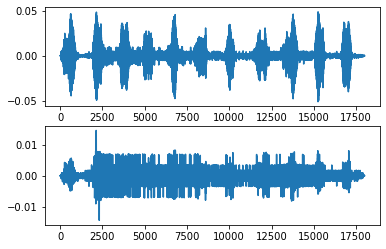

In [52]:
from sklearn.decomposition import FastICA
ica = FastICA()
unmixed = ica.fit_transform(x_centered.T)
fig,ax = plt.subplots(2)
ax[0].plot(unmixed[:,0])
ax[1].plot(unmixed[:,1])
plt.show()

In [61]:
rho_normal = np.empty((N,N))
for i in range(N) :
    for j in range(N):
        cov_ij = np.cov(s[i], recovered_signals_normal[j])[0,1]
        rho_manual[i,j] = cov_ij/(np.std(s[i])*np.std(recovered_signals_normal[j]))
print('correlation with normal gradient \n' + str( rho_normal))

rho_natural = np.empty((N,N))
for i in range(N) :
    for j in range(N):
        cov_ij = np.cov(s[i], recovered_signals_natural[j])[0,1]
        rho_natural[i,j] = cov_ij/(np.std(s[i])*np.std(recovered_signals_natural[j]))
print('correlation with natural gradient \n' + str(rho_natural))
rho_sklearn = np.empty((N,N))
for i in range(N) :
    for j in range(N):
        cov_ij = np.cov(s[i], unmixed.T[j])[0,1]
        rho_natural[i,j] = cov_ij/(np.std(s[i])*np.std(unmixed.T[j]))
print('correlation with natural gradient \n' + str(rho_sklearn))

correlation with normal gradient 
[[0.40008446 0.48151728]
 [0.91704243 0.87710619]]
correlation with natural gradient 
[[0.40008446 0.48151728]
 [0.91704243 0.87710619]]
correlation with natural gradient 
[[0.40008446 0.48151728]
 [0.91704243 0.87710619]]


identical coefficients ?

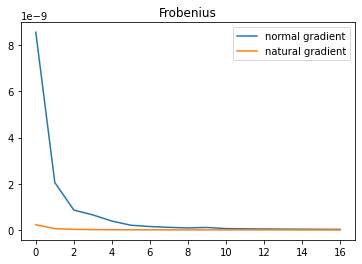

In [54]:
plt.plot(frobenius_normal, label = 'normal gradient')
plt.plot(frobenius_natural, label = 'natural gradient')
plt.legend()
plt.title('Frobenius')
plt.show()

Natural gradient converges immediately

In [55]:
U, S, Vt = np.linalg.svd(x_centered, full_matrices=False)
whitening_matrix = np.sqrt(np.linalg.pinv(np.diag(S))) @ U.T
x_whitened = whitening_matrix @ x_centered

W_natural_sphered, frobenius_natural_sphered = natural_gradient(x_whitened)
W_normal_sphered, frobenius_normal_sphered = normal_gradient(x_whitened)


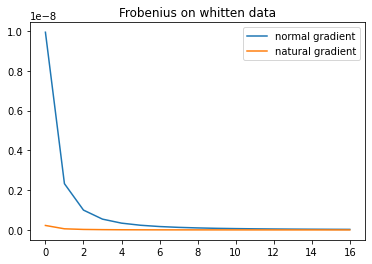

In [56]:
plt.plot(frobenius_normal_sphered, label = 'normal gradient')
plt.plot(frobenius_natural_sphered, label = 'natural gradient')
plt.legend()
plt.title('Frobenius on whitten data')
plt.show()

In [62]:
# not our code, and not working anyway

from scipy.stats import gaussian_kde


mixed_sources = x.T
unmixed_sources = unmixed
true_sources = s

mixed_densities = [gaussian_kde(mixed_sources[:, i]) for i in range(mixed_sources.shape[1])]
unmixed_densities = [gaussian_kde(unmixed_sources[:, i]) for i in range(unmixed_sources.shape[1])]
true_densities = [gaussian_kde(true_sources[:, i]) for i in range(true_sources.shape[1])]

x = np.linspace(-4, 4, 1000)

plt.figure(figsize=(12, 8))
for i in range(x.shape[1]):
    mixed_density_values = mixed_densities[i](x)
    unmixed_density_values = unmixed_densities[i](x)
    true_density_values = true_densities[i](x)

    plt.subplot(mixed_sources.shape[1], 1, i + 1)
    plt.plot(x, mixed_density_values, label='Mixed Signal')
    plt.plot(x, unmixed_density_values, label='Unmixed Signal')
    plt.plot(x, true_density_values, label='True Source')

    plt.ylabel('Density')
    plt.title(f'Signal {i + 1}')

plt.xlabel('Signal Value')
plt.tight_layout()
plt.legend()
plt.show()

LinAlgError: singular matrix